# Uber Trips Analysis

Uber has been a major source of travel for people living in urban areas. Some people don’t have their vehicles

while some don’t drive their vehicles intentionally because of their busy schedule. So different kinds of people 

are using the services of Uber and other taxi services.

By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the 

busiest hour for Uber and many other patterns. The dataset I’m using here is based on Uber trips from New York, a 

city with a very complex transportation system with a large residential community.

The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 

million pickups from January to June 2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('uber-raw-data-sep14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime) 

In [ ]:
df.head()

In [15]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

This data contains data about date and time, latitude and longitude, and a Base column that contains code 

affiliated with the uber pickup

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    1028136 non-null datetime64[ns]
Lat          1028136 non-null float64
Lon          1028136 non-null float64
Base         1028136 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


General data about our dataset

In [17]:
df.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [18]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [19]:
df.shape

(1028136, 4)

In [20]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [26]:
df['day']=df['Date/Time'].apply(lambda x:x.day)
df['weekday']=df['Date/Time'].apply(lambda x:x.weekday())
df['hour']=df['Date/Time'].apply(lambda x:x.hour)
df.head()

,Date/Time,Lat,Lon,Base,day,weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


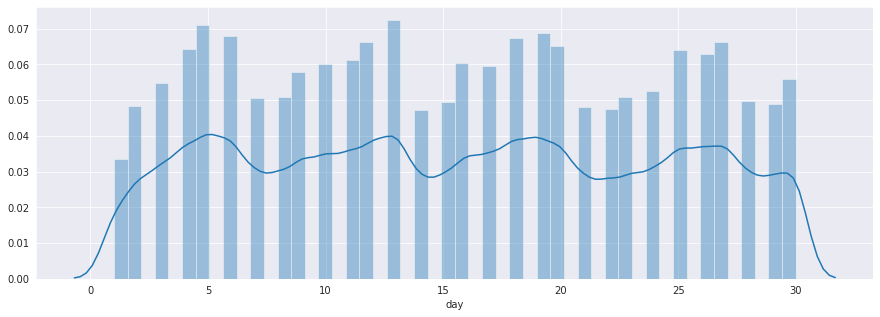

In [30]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.distplot(df['day'])
plt.title('THe number of passangers per day on')

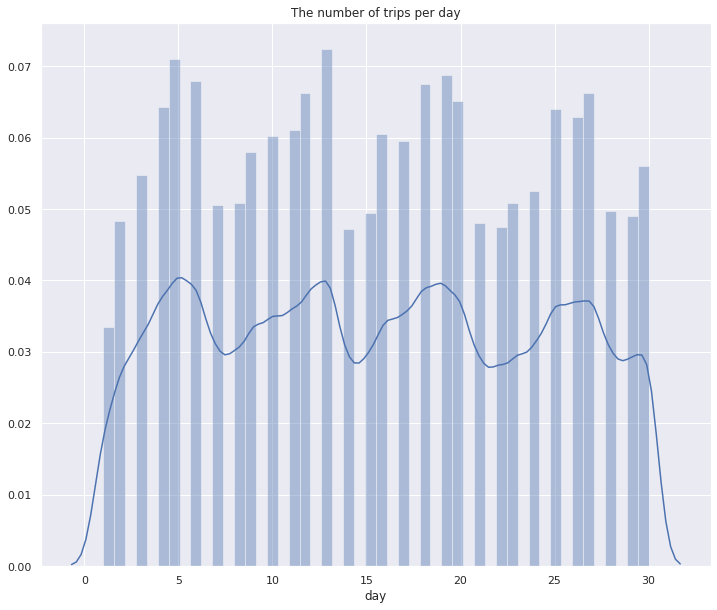

In [34]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(df['day'])
plt.title("The number of trips per day")
plt.show()

 From the above the number of trips are increasing on weekends.

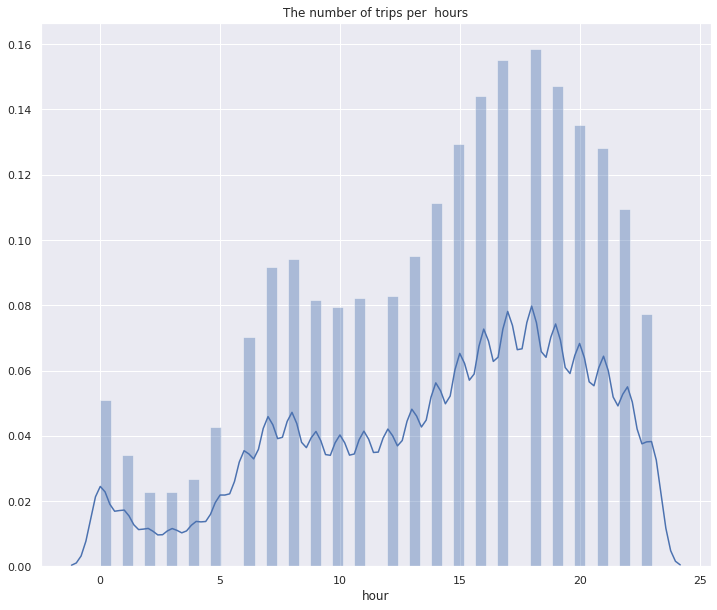

In [35]:
sns.distplot(df['hour'])
plt.title("The number of trips per  hours")
plt.show()

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the

trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing

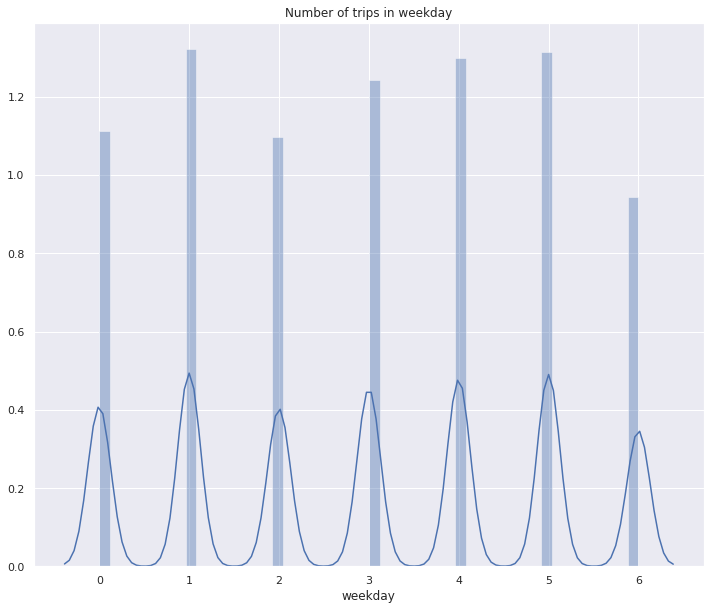

In [39]:
sns.distplot(df['weekday'])
plt.title("Number of trips in weekday")
plt.show()

0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for

outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are 

the highest